In [1]:
import pandas as pd
import json


In [2]:
with open('final_label_json_data.json') as f:
    sentiment = pd.DataFrame(json.load(f))
    
sentiment.head()    

,amazon_score_mixed,amazon_score_negative,amazon_score_neutral,amazon_score_positive,amazon_sentiments_label,azure_api_label,azure_api_score,google_sentiment_label,google_sentiment_magnitude,google_sentiment_socre,ibm_score,ibm_sentiments_label,sentiment,text
0,0.001549,0.000533,0.750581,0.247337,neutral,positive,0.978328,positive,1.1,0.2,0.816136,positive,positive,"Thank you. Good afternoon, everyone. And welco..."
1,0.009229,0.006072,0.880566,0.104133,neutral,neutral,0.500000,positive,1.4,0.2,0.558518,positive,positive,"As we look past Q1, we expect the channel inve..."
2,0.000831,0.008268,0.980631,0.010270,neutral,neutral,0.500000,neutral,0.0,0.0,0.000000,neutral,neutral,And your last question comes from the line of ...
3,0.011638,0.953385,0.034877,0.000099,negative,neutral,0.500000,negative,1.2,-0.3,-0.598559,negative,negative,"On the China gaming weakness, is it the slower..."
4,0.014957,0.000221,0.007328,0.977495,positive,positive,0.905933,positive,7.9,0.5,0.790615,positive,negative,"I don't know that we could tear that apart, te..."


In [3]:
sentiment['amazon_sentiment_score'] = sentiment[["amazon_score_negative","amazon_score_neutral","amazon_score_positive"]].max(axis=1)

In [4]:
#Keeping only the columns we need for mapping the label we assigned it with the scores of all 4 API's. 
sentiment_df = sentiment[['azure_api_score', 'google_sentiment_socre','ibm_score','amazon_sentiment_score','sentiment']]
sentiment_df

,azure_api_score,google_sentiment_socre,ibm_score,amazon_sentiment_score,sentiment
0,0.978328,0.2,0.816136,0.750581,positive
1,0.500000,0.2,0.558518,0.880566,positive
2,0.500000,0.0,0.000000,0.980631,neutral
3,0.500000,-0.3,-0.598559,0.953385,negative
4,0.905933,0.5,0.790615,0.977495,negative
5,0.904133,0.0,0.988573,0.674756,positive
6,0.832192,0.1,0.574769,0.373289,negative
7,0.500000,0.0,-0.586947,0.883574,neutral
8,0.500000,0.4,0.884016,0.717327,positive
9,0.748680,0.6,0.598940,0.637107,positive


In [5]:
sentiment_df.shape

(1644, 5)

In [6]:
#Removing the neutral sentiments for our model

sentiment_df = sentiment_df[sentiment_df['sentiment'] != 'neutral']
sentiment_df.head()

,azure_api_score,google_sentiment_socre,ibm_score,amazon_sentiment_score,sentiment
0,0.978328,0.2,0.816136,0.750581,positive
1,0.500000,0.2,0.558518,0.880566,positive
3,0.500000,-0.3,-0.598559,0.953385,negative
4,0.905933,0.5,0.790615,0.977495,negative
5,0.904133,0.0,0.988573,0.674756,positive


In [7]:
sentiment_df.shape

(811, 5)

In [8]:
#Build a model to map the output Sentiement label with the sentiment scores from all 4 apis

#label encode the output variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sentiment_df['sentiment'] = le.fit_transform(sentiment_df['sentiment'])

C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
sentiment_df.head()

,azure_api_score,google_sentiment_socre,ibm_score,amazon_sentiment_score,sentiment
0,0.978328,0.2,0.816136,0.750581,1
1,0.500000,0.2,0.558518,0.880566,1
3,0.500000,-0.3,-0.598559,0.953385,0
4,0.905933,0.5,0.790615,0.977495,0
5,0.904133,0.0,0.988573,0.674756,1


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:

X = sentiment_df.iloc[:,:-1]
Y = sentiment_df.iloc[:,-1]
features = X.columns.values

features

array(['azure_api_score', 'google_sentiment_socre', 'ibm_score',
       'amazon_sentiment_score'], dtype=object)

In [12]:
#Scaling all variables to a range of 0 to 1
sc = MinMaxScaler(feature_range= (0,1))
X = pd.DataFrame(sc.fit_transform(X), columns= features)
#features = X.columns 

In [15]:
features

array(['azure_api_score', 'google_sentiment_socre', 'ibm_score',
       'amazon_sentiment_score'], dtype=object)

In [20]:
X['Avg_Norm_Sentiment_Score'] = X[["azure_api_score","google_sentiment_socre","ibm_score", "amazon_sentiment_score"]].mean(axis=1)
X

,azure_api_score,google_sentiment_socre,ibm_score,amazon_sentiment_score,Avg_Norm_Sentiment_Score
0,0.980185,0.5625,0.903736,0.646323,0.773186
1,0.468419,0.5625,0.767878,0.831746,0.657636
2,0.468419,0.2500,0.157679,0.935622,0.452930
3,0.902730,0.7500,0.890277,0.970015,0.878256
4,0.900803,0.4375,0.994673,0.538159,0.717784
5,0.823834,0.5000,0.776448,0.108119,0.552100
6,0.468419,0.6875,0.939534,0.598887,0.673585
7,0.734484,0.8125,0.789195,0.484453,0.705158
8,0.952232,0.6875,0.934888,0.923819,0.874610
9,0.468419,0.5625,0.773411,0.486501,0.572708


In [21]:
X.loc[ X['Avg_Norm_Sentiment_Score'] >= 0.5, 'API_Predicted_Sentiment'] = 1
X.loc[ X['Avg_Norm_Sentiment_Score'] < 0.5, 'API_Predicted_Sentiment'] = 0
X

,azure_api_score,google_sentiment_socre,ibm_score,amazon_sentiment_score,Avg_Norm_Sentiment_Score,API_Predicted_Sentiment
0,0.980185,0.5625,0.903736,0.646323,0.773186,1.0
1,0.468419,0.5625,0.767878,0.831746,0.657636,1.0
2,0.468419,0.2500,0.157679,0.935622,0.452930,0.0
3,0.902730,0.7500,0.890277,0.970015,0.878256,1.0
4,0.900803,0.4375,0.994673,0.538159,0.717784,1.0
5,0.823834,0.5000,0.776448,0.108119,0.552100,1.0
6,0.468419,0.6875,0.939534,0.598887,0.673585,1.0
7,0.734484,0.8125,0.789195,0.484453,0.705158,1.0
8,0.952232,0.6875,0.934888,0.923819,0.874610,1.0
9,0.468419,0.5625,0.773411,0.486501,0.572708,1.0


In [22]:
X.API_Predicted_Sentiment.value_counts()

1.0    710
0.0    101
Name: API_Predicted_Sentiment, dtype: int64

In [27]:
Y.value_counts()

1    654
0    157
Name: sentiment, dtype: int64

In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y, X.API_Predicted_Sentiment)

array([[ 41, 116],
       [ 60, 594]], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Y, X.API_Predicted_Sentiment))

0.782983970406905


In [33]:
from sklearn.metrics import classification_report

print(classification_report(Y, X.API_Predicted_Sentiment))

             precision    recall  f1-score   support

          0       0.41      0.26      0.32       157
          1       0.84      0.91      0.87       654

avg / total       0.75      0.78      0.76       811



PLotting the Confusion matrix in Heatmap

[Text(0,0.5,'Positive'), Text(0,1.5,'Negative')]

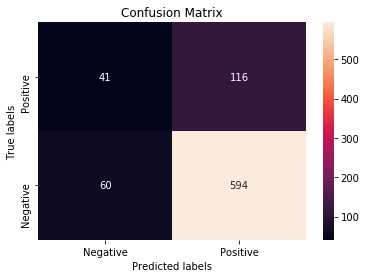

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

ax= plt.subplot()
#cm = classification_report(y_test, y_pred_lstm)
sns.heatmap(confusion_matrix(Y, X.API_Predicted_Sentiment), annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Positive', 'Negative'])